# ネットワーク可制御性（最大マッチングに基づく）

In [9]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy import stats

import matplotlib.pyplot as plt
import pulp
from utils import *

ネットワークの作成


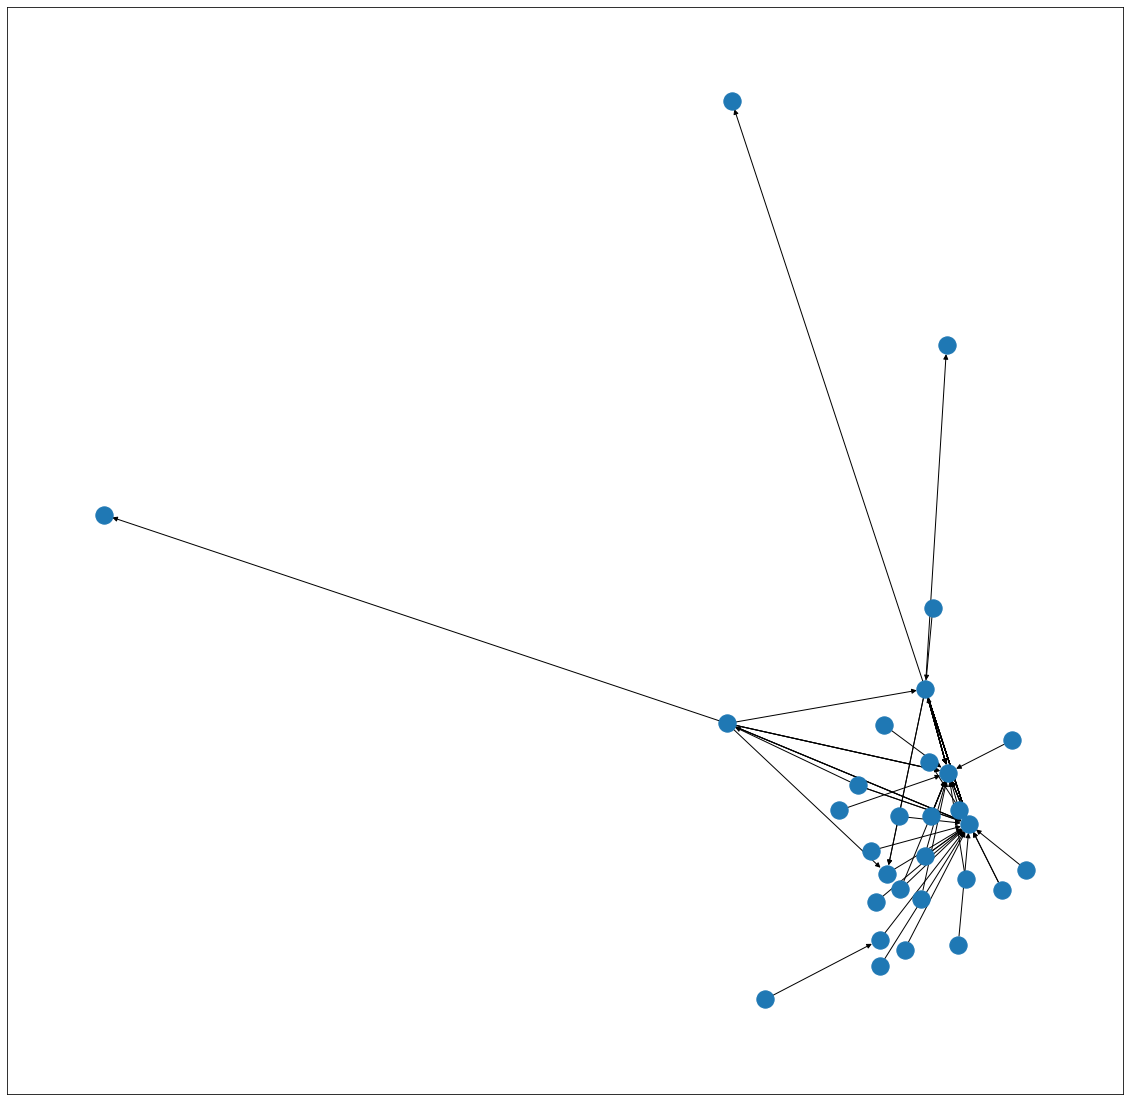

In [10]:
g = nx.scale_free_graph(30)
g.remove_edges_from(nx.selfloop_edges(g))

plt.figure(figsize=(20,20))
pos = nx.spring_layout(g)

nx.draw_networkx(g, with_labels=False, )

In [11]:
mds = get_mds_matching(g)

## 結果にアクセスする

In [12]:
print("drive nodeのサイズ",mds[0])

drive nodeのサイズ 22


In [13]:
mds[1]

{5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 15,
 16,
 17,
 19,
 20,
 21,
 22,
 23,
 25,
 26,
 27,
 28,
 29}

In [14]:
mds[2]

[False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [15]:
node_color = ["blue" for _ in range(len(g.nodes()))]
for x in mds[1]:
    node_color[x] = "red"


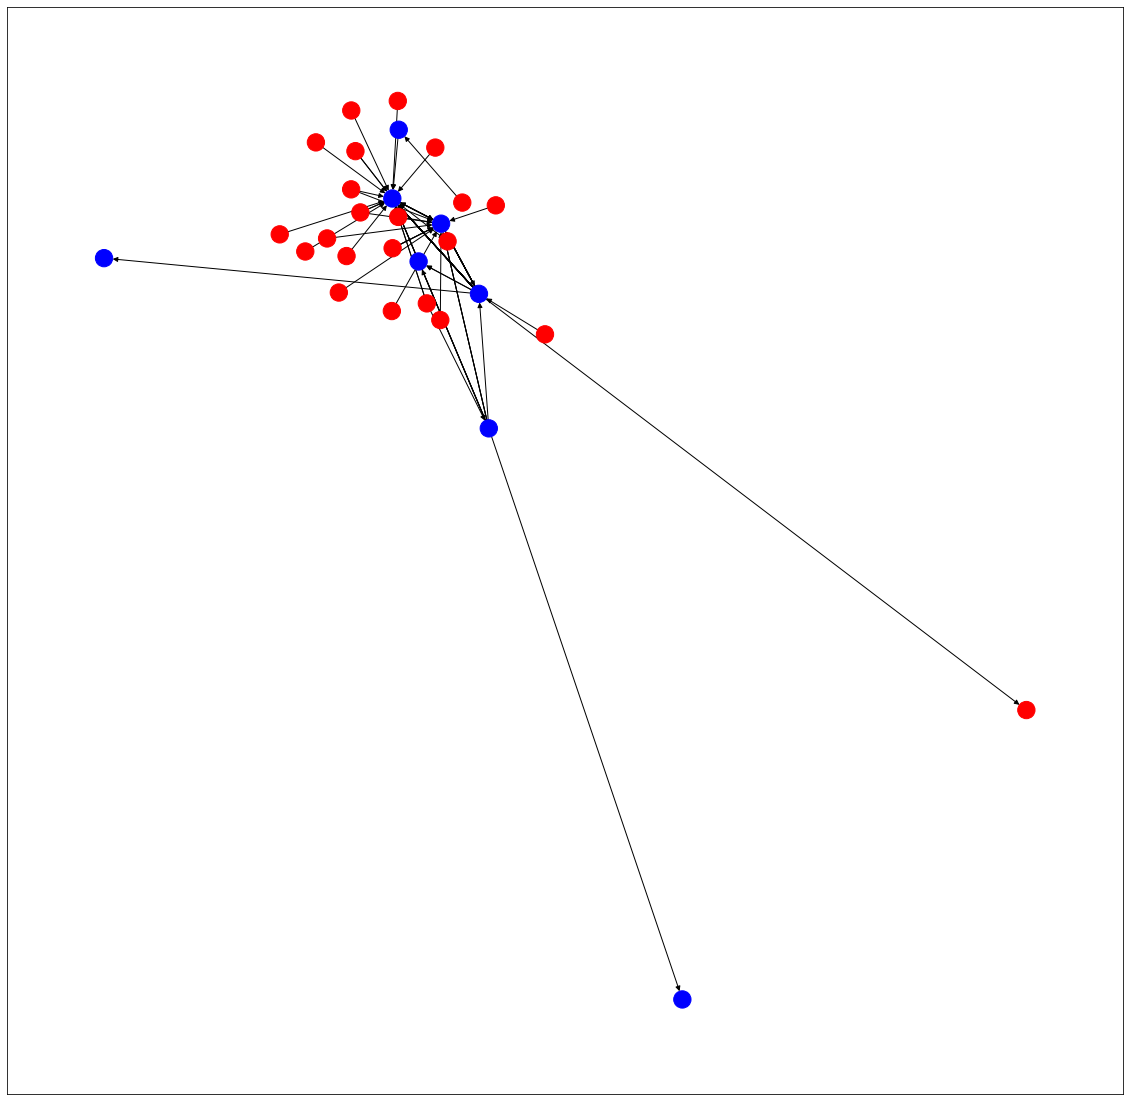

In [16]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(g)
nx.draw_networkx(g, with_labels=False, node_color=node_color)

## ネットワーク可制御性に基づいてノードを「不必要」「中立」「不可欠」に分類する。

### 分類を得る

In [17]:
node_class = node_classification_controllability(g, get_mds=get_mds_matching)

In [20]:
node_color = []
for i in range(len(node_class)):
    if node_class[i] == "dispensable":
        node_color.append("gray")
    elif node_class[i] == "neutral":
        node_color.append("skyblue")
    elif node_class[i] == "indispensable":
        node_color.append("pink")

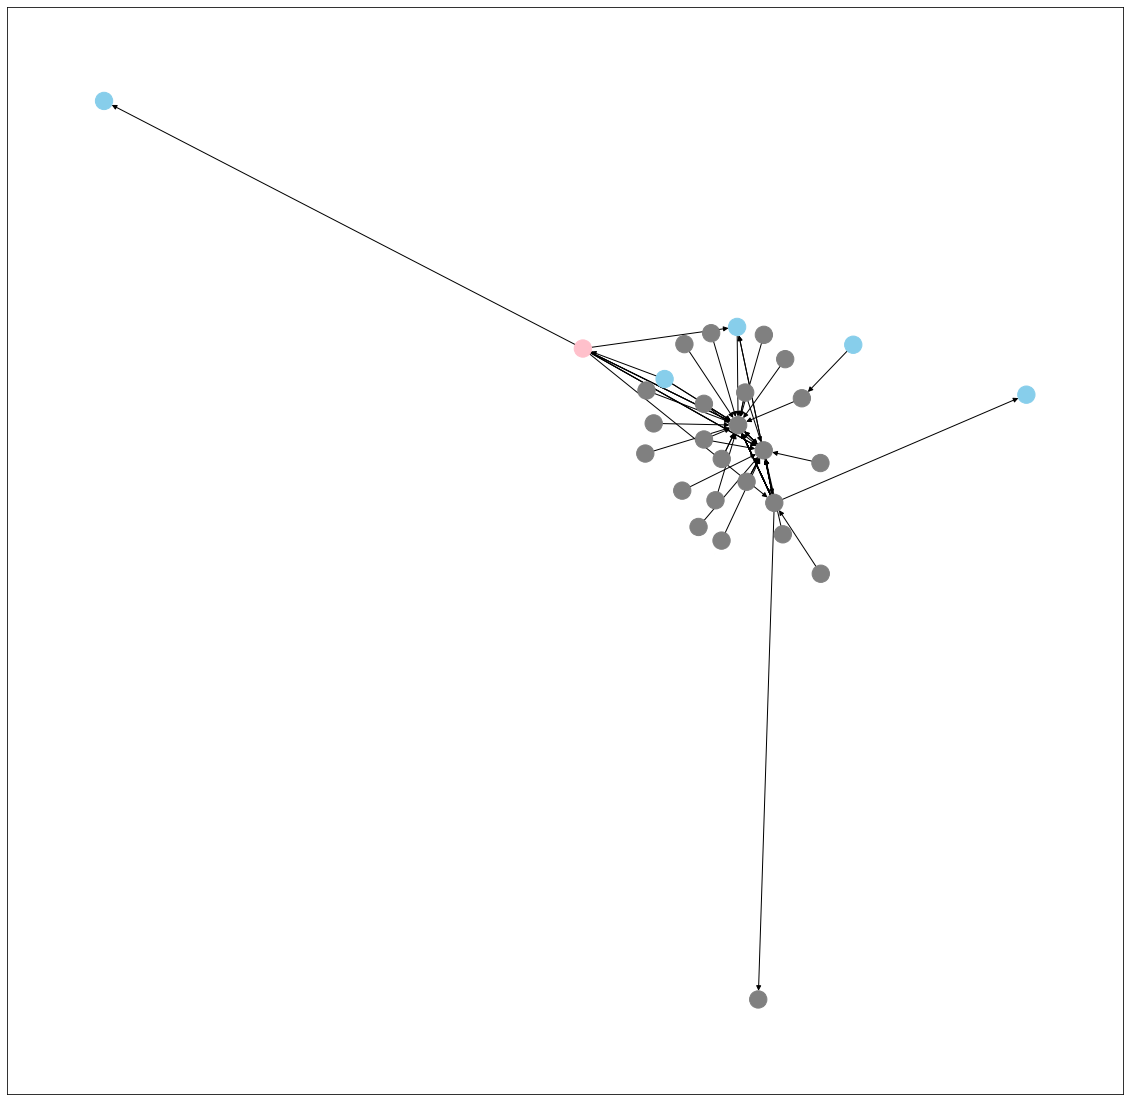

In [21]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(g)
nx.draw_networkx(g, with_labels=False, node_color=node_color)